In [1]:
import torch
import numpy as np
import sklearn
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import spacy
import string

In [77]:
import nltk
import tqdm
import pickle as pkl

In [172]:
import matplotlib.pyplot as plt

In [223]:
os.getcwd()
path = '/Users/williamgodel/Google Drive/Grad School/Year Three/NLP/HW1'

In [273]:
#loading train negative reviews
os.chdir('/Users/williamgodel/Google Drive/Grad School/Year Three/NLP/HW1/aclImdb/train/neg')

neg_rev = []
for x in os.listdir():
    neg_rev.append(open(x,'r').read())


#loading train positive reviews
os.chdir('/Users/williamgodel/Google Drive/Grad School/Year Three/NLP/HW1/aclImdb/train/pos')

pos_rev = []
for x in os.listdir():
    pos_rev.append(open(x,'r').read())

all_rev = neg_rev
all_rev.extend(pos_rev)
train_data = pd.DataFrame({"reviews":all_rev})
train_data['positive'] = 0
train_data.iloc[12500:,1] = 1

X_train, X_val, y_train, y_val = train_test_split(train_data['reviews'], train_data['positive'], test_size=0.2, random_state=42)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

In [79]:
#loading test negative reviews
os.chdir('/Users/williamgodel/Google Drive/Grad School/Year Three/NLP/HW1/aclImdb/test/neg')

neg_rev = []
for x in os.listdir():
    neg_rev.append(open(x,'r').read())


#loading test positive reviews
os.chdir('/Users/williamgodel/Google Drive/Grad School/Year Three/NLP/HW1/aclImdb/test/pos')

pos_rev = []
for x in os.listdir():
    pos_rev.append(open(x,'r').read())

all_rev = neg_rev
all_rev.extend(pos_rev)
test_data = pd.DataFrame({"reviews":all_rev})
test_data['positive'] = 0
test_data.iloc[12500:,1] = 1
X_test, y_test = test_data.iloc[:,0], test_data.iloc[:,1]

In [80]:
print ("Train dataset size is {}".format(len(X_train)))
print ("Val dataset size is {}".format(len(X_val)))
print ("Test dataset size is {}".format(len(test_data)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [165]:
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [67]:
# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation
def tokenize(sent, num_grams):
    tokens = tokenizer(sent)
    tokens_1 = [token.text.lower() for token in tokens if (token.text not in punctuations)]
    ngram_lst = []
    if num_grams > 1:
        for t in range(2,num_grams+1):
            ngram_lst += (nltk.ngrams(tokens_1,t))
    all_tokens = tokens_1 + ngram_lst
    return all_tokens

In [73]:
#tokenize
def tokenize_dataset(dataset, num_grams):
    token_dataset = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens = []
    
    for sample in dataset:
        tokens = tokenize(sample, num_grams)
        token_dataset.append(tokens)
        all_tokens += tokens

    return token_dataset, all_tokens

In [92]:
os.chdir(path)
N_grams = 1

val_data_tokens, _ = tokenize_dataset(X_val,N_grams)
pkl.dump(val_data_tokens, open("val_data_tokens.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(X_test,N_grams)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

print ("Tokenizing train data")
train_data_tokens, all_train_tokens = tokenize_dataset(X_train,N_grams)
pkl.dump(train_data_tokens, open("train_data_tokens.p", "wb"))
pkl.dump(all_train_tokens, open("all_train_tokens.p", "wb"))

Tokenizing test data
Tokenizing train data


In [256]:
os.chdir(path)
N_grams = 2

val_data_tokens_2, _ = tokenize_dataset(X_val,N_grams)
pkl.dump(val_data_tokens_2, open("val_data_tokens_2.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_2, _ = tokenize_dataset(X_test,N_grams)
pkl.dump(test_data_tokens_2, open("test_data_tokens_2.p", "wb"))

print ("Tokenizing train data")
train_data_tokens_2, all_train_tokens_2 = tokenize_dataset(X_train,N_grams)
pkl.dump(train_data_tokens_2, open("train_data_tokens_2.p", "wb"))
pkl.dump(all_train_tokens_2, open("all_train_tokens_2.p", "wb"))

N_grams = 3

val_data_tokens_3, _ = tokenize_dataset(X_val,N_grams)
pkl.dump(val_data_tokens_3, open("val_data_tokens_3.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_3, _ = tokenize_dataset(X_test,N_grams)
pkl.dump(test_data_tokens_3, open("test_data_tokens_3.p", "wb"))

print ("Tokenizing train data")
train_data_tokens_3, all_train_tokens_3 = tokenize_dataset(X_train,N_grams)
pkl.dump(train_data_tokens_3, open("train_data_tokens_3.p", "wb"))
pkl.dump(all_train_tokens_3, open("all_train_tokens_3.p", "wb"))

N_grams = 4

val_data_tokens_4, _ = tokenize_dataset(X_val,N_grams)
pkl.dump(val_data_tokens_4, open("val_data_tokens_4.p", "wb"))

#test set tokens
print ("Tokenizing test data")
test_data_tokens_4, _ = tokenize_dataset(X_test,N_grams)
pkl.dump(test_data_tokens_4, open("test_data_tokens_4.p", "wb"))

print ("Tokenizing train data")
train_data_tokens_4, all_train_tokens_4 = tokenize_dataset(X_train,N_grams)
pkl.dump(train_data_tokens_4, open("train_data_tokens_4.p", "wb"))
pkl.dump(all_train_tokens_4, open("all_train_tokens_4.p", "wb"))

Tokenizing test data
Tokenizing train data
Tokenizing test data
Tokenizing train data
Tokenizing test data
Tokenizing train data


In [131]:
len(test_data_tokens)

25000

In [ ]:
os.chdir(path)
train_data_tokens = pkl.load(open("train_data_tokens.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens.p", "rb"))

In [272]:
del pos_rev, neg_rev, all_rev, train_data, test_data
del X_train, X_test, X_val

In [93]:
from collections import Counter

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

token2id, id2token = build_vocab(all_train_tokens)

In [95]:
# Checking to see if things worked
import random
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 6477 ; token stairs
Token stairs; token id 6477


In [99]:
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data

train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 5000
Test dataset size is 25000


In [120]:
MAX_SENTENCE_LENGTH = 200

from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]


In [167]:
BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data_indices, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, y_val)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, y_test)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

In [168]:
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__()
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0)
        self.linear = nn.Linear(emb_dim,20)
    
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data)
        out = torch.sum(out, dim=1)
        out /= length.view(length.size()[0],1).expand_as(out).float()
     
        # return logits
        out = self.linear(out.float())
        return out



In [274]:
#basic test
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

learning_rate = 0.01
num_epochs = 2# number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)


def test_model_LOSS(loader, model):
    """
    Help function for model's loss on a dataset
    @param: loader - data loader for the dataset to test against
    """
    total = 0
    model.eval()
    with torch.no_grad():
        for data, lengths, labels in loader:
            data_batch, length_batch, label_batch = data, lengths, labels
            outputs = model(data_batch, length_batch)
            #predicted = outputs.max(1, keepdim=True)[1]
            eval_loss = criterion(outputs, label_batch)
            total += eval_loss.item()
    
    return total

loss_vals = []
acc_vals = []
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):        
        model.train()
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss_vals.append(loss/labels.size(0))
        loss.backward()
        optimizer.step()
        
        
    
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            acc_vals.append(val_acc)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/2], Step: [101/625], Validation Acc: 78.5
Epoch: [1/2], Step: [201/625], Validation Acc: 83.86
Epoch: [1/2], Step: [301/625], Validation Acc: 85.06
Epoch: [1/2], Step: [401/625], Validation Acc: 85.92
Epoch: [1/2], Step: [501/625], Validation Acc: 86.24
Epoch: [1/2], Step: [601/625], Validation Acc: 86.9
Epoch: [2/2], Step: [101/625], Validation Acc: 86.9
Epoch: [2/2], Step: [201/625], Validation Acc: 86.66
Epoch: [2/2], Step: [301/625], Validation Acc: 86.16
Epoch: [2/2], Step: [401/625], Validation Acc: 85.3
Epoch: [2/2], Step: [501/625], Validation Acc: 86.56
Epoch: [2/2], Step: [601/625], Validation Acc: 86.66


In [275]:
print ("After training for {} epochs".format(num_epochs))
print ("Train Acc {}".format(test_model(train_loader, model)))
print ("Val Acc {}".format(test_model(val_loader, model)))

After training for 2 epochs
Train Acc 95.28
Val Acc 86.58


<Figure size 432x288 with 0 Axes>

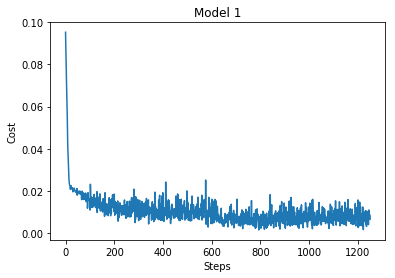

In [225]:
os.chdir(path)
plt.clf()
fig = plt.figure()
plt.title('Model 1')
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.plot(loss_vals)
fig.savefig('model1.png')

<Figure size 432x288 with 0 Axes>

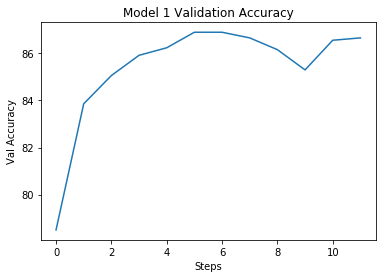

In [276]:
os.chdir(path)
plt.clf()
fig = plt.figure()
plt.title('Model 1 Validation Accuracy')
plt.xlabel('Steps')
plt.ylabel('Val Accuracy')
plt.plot(acc_vals)
fig.savefig('model1_acc.png')

In [229]:
#general model function for testing hyper parameters


def Model_train(emb_dim, model, learning_rate, \
                num_epochs, criterion, optimizer, \
                train_loader):
    


    loss_vals = []
    acc_est = []
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):        
            model.train()
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss_vals.append(loss/labels.size(0))
            loss.backward()
            optimizer.step()
        
    
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                acc_est.append(val_acc)
                #loss_vals.append(test_model_LOSS(train_loader,model))
                print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                           epoch+1, num_epochs, i+1, len(train_loader), val_acc))
    
    return loss_vals, acc_est

In [278]:
#Learning rates and embedding dimensions
num_epochs = 5# number epoch to train
learning_rates = [0.001, .005, .01, .05, .1]
embedd_dim = [100,200,500,1000]

loss_performance = []
acc_performance = []

for u in learning_rates:
    for o in embedd_dim:
    
        emb_dim = o
        model = BagOfWords(len(id2token), emb_dim)
    
        criterion = torch.nn.CrossEntropyLoss()  
        optimizer = torch.optim.Adam(model.parameters(), lr=u)
    
        loss_vals, acc_est = Model_train(emb_dim = emb_dim, model = model, learning_rate = u, \
                                         num_epochs = num_epochs, criterion = criterion, optimizer = optimizer, \
                                         train_loader = train_loader)
    
        loss_performance.append(loss_vals)
        acc_performance.append(test_model(val_loader, model))


Epoch: [1/5], Step: [101/625], Validation Acc: 52.94
Epoch: [1/5], Step: [201/625], Validation Acc: 59.12
Epoch: [1/5], Step: [301/625], Validation Acc: 63.34
Epoch: [1/5], Step: [401/625], Validation Acc: 68.18
Epoch: [1/5], Step: [501/625], Validation Acc: 71.06
Epoch: [1/5], Step: [601/625], Validation Acc: 73.34
Epoch: [2/5], Step: [101/625], Validation Acc: 73.68
Epoch: [2/5], Step: [201/625], Validation Acc: 77.18
Epoch: [2/5], Step: [301/625], Validation Acc: 78.74
Epoch: [2/5], Step: [401/625], Validation Acc: 80.24
Epoch: [2/5], Step: [501/625], Validation Acc: 80.92
Epoch: [2/5], Step: [601/625], Validation Acc: 81.94
Epoch: [3/5], Step: [101/625], Validation Acc: 82.92
Epoch: [3/5], Step: [201/625], Validation Acc: 82.96
Epoch: [3/5], Step: [301/625], Validation Acc: 82.68
Epoch: [3/5], Step: [401/625], Validation Acc: 83.88
Epoch: [3/5], Step: [501/625], Validation Acc: 84.26
Epoch: [3/5], Step: [601/625], Validation Acc: 84.48
Epoch: [4/5], Step: [101/625], Validation Acc:

Epoch: [2/5], Step: [101/625], Validation Acc: 86.58
Epoch: [2/5], Step: [201/625], Validation Acc: 86.02
Epoch: [2/5], Step: [301/625], Validation Acc: 84.6
Epoch: [2/5], Step: [401/625], Validation Acc: 86.76
Epoch: [2/5], Step: [501/625], Validation Acc: 86.86
Epoch: [2/5], Step: [601/625], Validation Acc: 87.06
Epoch: [3/5], Step: [101/625], Validation Acc: 86.04
Epoch: [3/5], Step: [201/625], Validation Acc: 86.08
Epoch: [3/5], Step: [301/625], Validation Acc: 86.82
Epoch: [3/5], Step: [401/625], Validation Acc: 86.64
Epoch: [3/5], Step: [501/625], Validation Acc: 86.3
Epoch: [3/5], Step: [601/625], Validation Acc: 86.64
Epoch: [4/5], Step: [101/625], Validation Acc: 86.52
Epoch: [4/5], Step: [201/625], Validation Acc: 86.52
Epoch: [4/5], Step: [301/625], Validation Acc: 86.18
Epoch: [4/5], Step: [401/625], Validation Acc: 86.4
Epoch: [4/5], Step: [501/625], Validation Acc: 86.28
Epoch: [4/5], Step: [601/625], Validation Acc: 86.38
Epoch: [5/5], Step: [101/625], Validation Acc: 86

Epoch: [3/5], Step: [101/625], Validation Acc: 85.68
Epoch: [3/5], Step: [201/625], Validation Acc: 85.82
Epoch: [3/5], Step: [301/625], Validation Acc: 85.72
Epoch: [3/5], Step: [401/625], Validation Acc: 85.7
Epoch: [3/5], Step: [501/625], Validation Acc: 85.76
Epoch: [3/5], Step: [601/625], Validation Acc: 86.56
Epoch: [4/5], Step: [101/625], Validation Acc: 85.68
Epoch: [4/5], Step: [201/625], Validation Acc: 85.42
Epoch: [4/5], Step: [301/625], Validation Acc: 85.74
Epoch: [4/5], Step: [401/625], Validation Acc: 84.54
Epoch: [4/5], Step: [501/625], Validation Acc: 85.5
Epoch: [4/5], Step: [601/625], Validation Acc: 85.2
Epoch: [5/5], Step: [101/625], Validation Acc: 85.14
Epoch: [5/5], Step: [201/625], Validation Acc: 84.98
Epoch: [5/5], Step: [301/625], Validation Acc: 84.94
Epoch: [5/5], Step: [401/625], Validation Acc: 84.14
Epoch: [5/5], Step: [501/625], Validation Acc: 84.8
Epoch: [5/5], Step: [601/625], Validation Acc: 84.0
Epoch: [1/5], Step: [101/625], Validation Acc: 79.4

Epoch: [4/5], Step: [101/625], Validation Acc: 83.84
Epoch: [4/5], Step: [201/625], Validation Acc: 82.72
Epoch: [4/5], Step: [301/625], Validation Acc: 83.08
Epoch: [4/5], Step: [401/625], Validation Acc: 83.52
Epoch: [4/5], Step: [501/625], Validation Acc: 81.42
Epoch: [4/5], Step: [601/625], Validation Acc: 83.98
Epoch: [5/5], Step: [101/625], Validation Acc: 83.28
Epoch: [5/5], Step: [201/625], Validation Acc: 83.02
Epoch: [5/5], Step: [301/625], Validation Acc: 81.94
Epoch: [5/5], Step: [401/625], Validation Acc: 80.14
Epoch: [5/5], Step: [501/625], Validation Acc: 82.96
Epoch: [5/5], Step: [601/625], Validation Acc: 82.44
Epoch: [1/5], Step: [101/625], Validation Acc: 81.52
Epoch: [1/5], Step: [201/625], Validation Acc: 84.32
Epoch: [1/5], Step: [301/625], Validation Acc: 83.68
Epoch: [1/5], Step: [401/625], Validation Acc: 84.98
Epoch: [1/5], Step: [501/625], Validation Acc: 84.94
Epoch: [1/5], Step: [601/625], Validation Acc: 85.38
Epoch: [2/5], Step: [101/625], Validation Acc:

<Figure size 432x288 with 0 Axes>

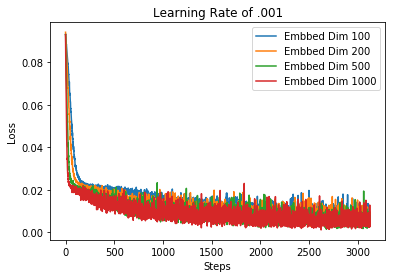

In [283]:
plt.clf()
fig = plt.figure()
for i in range(0,4):
    plt.plot(loss_performance[i], label = "Embbed Dim {}".format(embedd_dim[i]))
    

plt.title('Learning Rate of .001')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
fig.savefig('model2_dim_perf.png')    

In [279]:
perf_table = np.array(acc_performance).reshape(5,4)

In [280]:
print(pd.DataFrame(perf_table).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &      3 \\
\midrule
0 &  86.36 &  86.96 &  87.18 &  87.52 \\
1 &  85.98 &  85.68 &  84.94 &  84.64 \\
2 &  84.90 &  84.82 &  84.64 &  84.96 \\
3 &  84.76 &  84.90 &  83.70 &  83.42 \\
4 &  79.90 &  82.96 &  83.28 &  82.48 \\
\bottomrule
\end{tabular}



In [288]:
#Optimization and learning annealling
#run with more epochs
#add an optimizer?
num_epochs = 5# number epoch to train
learning_rates = .001
embedd_dim = 1000

loss_performance_3 = []
acc_performance_3 = []

gammas = [1,.5,.1,.01]


for u in range(0,2):
    for o in gammas:
        model = BagOfWords(len(id2token), embedd_dim)
    
        criterion = torch.nn.CrossEntropyLoss()  
        
        if u == 0:
            optimizer = torch.optim.SGD(model.parameters(), lr=learning_rates)
        else:
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rates)
            
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=o)
    
        loss_vals, acc_est = Model_train(emb_dim = emb_dim, model = model, learning_rate = learning_rates, \
                                         num_epochs = num_epochs, criterion = criterion, optimizer = optimizer, \
                                         train_loader = train_loader)
    
        loss_performance_3.append(loss_vals)
        acc_performance_3.append(test_model(val_loader, model))

Epoch: [1/5], Step: [101/625], Validation Acc: 49.82
Epoch: [1/5], Step: [201/625], Validation Acc: 50.96
Epoch: [1/5], Step: [301/625], Validation Acc: 51.88
Epoch: [1/5], Step: [401/625], Validation Acc: 52.64
Epoch: [1/5], Step: [501/625], Validation Acc: 55.02
Epoch: [1/5], Step: [601/625], Validation Acc: 56.28
Epoch: [2/5], Step: [101/625], Validation Acc: 60.14
Epoch: [2/5], Step: [201/625], Validation Acc: 59.82
Epoch: [2/5], Step: [301/625], Validation Acc: 60.24
Epoch: [2/5], Step: [401/625], Validation Acc: 62.62
Epoch: [2/5], Step: [501/625], Validation Acc: 62.22
Epoch: [2/5], Step: [601/625], Validation Acc: 61.62
Epoch: [3/5], Step: [101/625], Validation Acc: 62.92
Epoch: [3/5], Step: [201/625], Validation Acc: 63.62
Epoch: [3/5], Step: [301/625], Validation Acc: 63.82
Epoch: [3/5], Step: [401/625], Validation Acc: 62.9
Epoch: [3/5], Step: [501/625], Validation Acc: 63.84
Epoch: [3/5], Step: [601/625], Validation Acc: 63.82
Epoch: [4/5], Step: [101/625], Validation Acc: 

Epoch: [2/5], Step: [101/625], Validation Acc: 84.5
Epoch: [2/5], Step: [201/625], Validation Acc: 84.9
Epoch: [2/5], Step: [301/625], Validation Acc: 85.34
Epoch: [2/5], Step: [401/625], Validation Acc: 85.82
Epoch: [2/5], Step: [501/625], Validation Acc: 86.0
Epoch: [2/5], Step: [601/625], Validation Acc: 84.86
Epoch: [3/5], Step: [101/625], Validation Acc: 86.36
Epoch: [3/5], Step: [201/625], Validation Acc: 86.48
Epoch: [3/5], Step: [301/625], Validation Acc: 86.06
Epoch: [3/5], Step: [401/625], Validation Acc: 87.18
Epoch: [3/5], Step: [501/625], Validation Acc: 87.0
Epoch: [3/5], Step: [601/625], Validation Acc: 86.32
Epoch: [4/5], Step: [101/625], Validation Acc: 86.2
Epoch: [4/5], Step: [201/625], Validation Acc: 87.38
Epoch: [4/5], Step: [301/625], Validation Acc: 87.14
Epoch: [4/5], Step: [401/625], Validation Acc: 87.24
Epoch: [4/5], Step: [501/625], Validation Acc: 87.24
Epoch: [4/5], Step: [601/625], Validation Acc: 87.48
Epoch: [5/5], Step: [101/625], Validation Acc: 87.0

In [289]:
perf_table_3 = np.array(acc_performance_3).reshape(2,4)

In [290]:
print(pd.DataFrame(perf_table_3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      0 &      1 &      2 &      3 \\
\midrule
0 &  65.34 &  64.20 &  65.18 &  64.72 \\
1 &  87.00 &  87.14 &  87.24 &  86.94 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

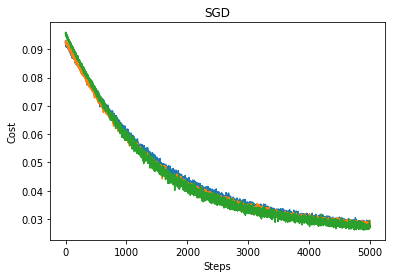

In [270]:
plt.clf()
fig = plt.figure()
plt.title('SGD')
plt.xlabel('Steps')
plt.ylabel('Cost')
for i in range(0,3):
    plt.plot(loss_performance_3[i])
fig.savefig('model3_sgd.png')

<Figure size 432x288 with 0 Axes>

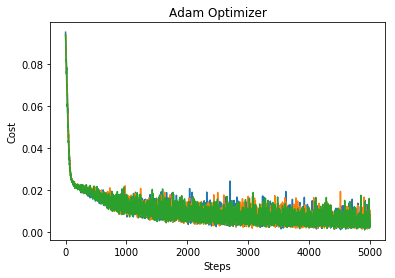

In [271]:
plt.clf()
fig = plt.figure()
plt.title('Adam Optimizer')
plt.xlabel('Steps')
plt.ylabel('Cost')
for i in range(3,6):
    plt.plot(loss_performance_3[i])
fig.savefig('model3_adam.png')